# Calcul des forces de pression sur une digue

**Modélisation Numérique en Physique - S2**

**Miniprojet 4**

**ARGUELLO Camilo**


## Tableau

1. Introduction
2. Forces
3. Modelisation
4. Cas de digues convexes
5. Conclusion

## Introduction

L'objectif de ce projet est d'analyser un système d'une digue immergé dans l'eau. On va vérifier si la digue peut ou non être déplacé sous l'effet de la pression exercée par l'eau.

## Forces

### a) Bilan des forces 


Dans un système immergé, la pression varie selon l'altitude. Nous allons trouver une force qui considère ce changement. On suppose par exemple un systeme d'un surface immergé dans l'eau.

<img src="./2x/force-strip@2x.png" width="400" style="display:block;margin:0 auto;" />

Si on prend des petites régions de la surface, on va pouvoir calculer la pression dans chacune des régions ainsi que la pression générale.

Soit $dA$ l'aire de la section horizontale, avec une altitude $dy$, par consequence:

$$dA = L\,dy$$

Si la pression change en fonction de l'altitude, on peut dire que $P = \rho\,g\,y$, avec $\rho$ une constante de densité du liquide, $g$ l'acceleration de la gravité et $y$ le déplacement sur l'axis `y`. Ainsi, on va calculer la force dans cette section.

$$  dF = P\,dA $$
$$ dF = \rho\,g\,y\,dA $$
$$ dF = \rho\,g\,y\,L\,dy $$

Avec l'integration, on a la force $F$:

$$ F = \int_{y=0}^{y=H}\rho\,g\,y\,L\,dy $$
$$ F = \rho\,g\,L \int_{y=0}^{y=H}y\,dy $$
$$ F = \rho\,g\,L (\frac{y^2}{2})_{0}^{H} $$
$$ F = \frac{\rho\,g\,L\,H^2}{2} = \frac{1}{2}\times \rho\,g\,H \times H\,L $$
$$ F_P = P_{moy}\,A \longrightarrow P_{moy} = \frac{F_P}{A} $$

Cette force est la force moyenne globale dû à la pression de l'eau sur le beton. Maintenant, si on se place dans le cas d'une digue qui reçoit la pression de l'eau dans une coté. 

<img src="./2x/digue-diagram-forces@2x.png" width="400" style="display:block;margin:0 auto;" />

Digue à modeliser. La digue est divisé en deux séctions: $w_1$ (partie à gauche) et $w_2$ (partie à droite). Pour compléter le système, on va considérer aussi $w_3$ pour l'eau.

Avec $x = x_1 + x_2$, et $w = w_1 + w_2 + w_3$.

Donc dans ce cas on a une force $F_{P}$ qui provient de la pression de l'eau. Ainsi qu'on considére le poids de la digue et l'eau $w$. La force de frottement $F_F$. Finalement, la force de résultant $R$.

<img src="./2x/forces-total@2x.png" width="300" style="display:block;margin:0 auto;" />



### b) Pression hydrostatique dans l’eau ($P_{eau}$)

Lorsque la préssion augménte selon la profundeur ($y$) de la digue, on a:

$$ P = \rho g y $$

### c) Des équations d'équilibre statique

On considére l'objet comme statique si la force $F_F$ (qui est opposé à la composante tangentielle $F_{P_x}$), est supérieure à la force produit par la pression d'eau. Pour faire l'analyse, on utilise le principe d'inertie, ainsi que l'influence des forces extérieures.

$ \sum F = 0 $

## Modélisation


Dans le cadre du projet, nous allons modeliser initialement une digue avec deux cotés qui sont données par une fonction lineaire.

Les fonctions $f_{air}$ et $f_{eau}$, elles sont de la forme affine:

$$ f(x) = ax + b $$

Donc $f_{air}(y)$ est une fonction croissante entre $x_a$ et $0$.

$$ f_{air}(y) = -\frac{x_a}{H}.(y-H) = - x_a \left(\frac{y}{H} - 1\right) $$

La fonction $f_{eau}$ peut se décrire de la même façon afine, cependant lorqu'il est décroissante, la pente doîte être negative.

$$ f_{eau}(y) = - x_e \frac{y}{H} + x_e $$

$$ f_{eau}(y) = - x_e \left(\frac{y}{H} - 1\right) $$

$$ f'_{eau}(y) = - \frac{x_e }{H} $$



In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
## Global variables
H = 10 # m
L = 1 # m
g = 9.8 # m / s^2
rho = 1000 # Densité l'eau
mu = 0.5 # coefficient frottement béton
m_digue = 3000 # kg / m3

# Ce code permet d'afficher les courbes représentant la digue
xa = -5
xe = +5

# On crée un tableau de y
y = np.linspace(0, H, 1000)

# On définit les fonctions côté eau et côté air, ici les courbes concaves
def fair(y):
    return - xa * ((y / H) - 1)

def feau(y):
    return - xe  * ((y / H) - 1)

def f_p_eau(y = 1):
    return - xe / H


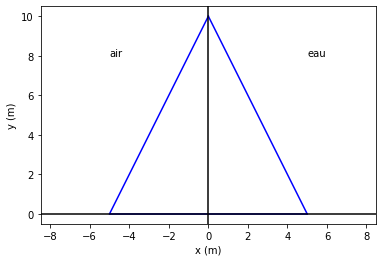

In [3]:
# On trace
plt.plot(fair(y), y, '-b') 
plt.plot(feau(y), y, '-b')  ## Décommenter après avoir codé la fonction feau(x)
 
plt.plot([xe, xa], [0, 0], '-b') # Bas de la digue
plt.xlabel('x (m)') 
plt.ylabel('y (m)')
plt.text(xe, 8, 'eau')
plt.text(xa, 8, 'air')
plt.axis('equal') # Permet d'avoir un plot isométrique
plt.axhline(0, color = "black")
plt.axvline(0, color = "black")
plt.xlim(-8, 8)
plt.show()

### Volume de digue

Nous allons calculer le volume de la digue. Pour ce cas là, on considére qu'elle a une forme triangulaire, dans le coté d'air, ainsi que dans le coté d'eau. 

En principe le volume d'un triangle (avec un profundeur) peut se calculer avec l'expression $ v_{triangle} = \frac{1}{2} \times width \times height \times length $. Dans notre exemple $ width = x_1 + x_2$, $height = H$, $length = L$. Cependant, une autre façon de calculer le volume est à partir du calcul des aires avec l'aide de l'intégrale dépuis `xa` jusq'à `xe`. Pour les fonctions `fair` et `feau`, pour multiplier avec la profundeur $L$.

L'intégral est une fonction qui utilise la methode du point milieu pour trouver une valeur plus précise de valeur trouvé analytiquement. Cette méthode considére les valeurs de la fonction $f$ au centre des $n$ intervalles. Ainsi, on aura $x_i = a + ( i + \frac{1}{2} )\times\Delta x$, dans l'intervalle:

$$
Integrale(f) = \sum_{i=0}^{n-1} f(x_i)\Delta x  
$$

Avec $\Delta x = \frac{b-a}{n}$.

In [4]:
def calcule_integrale(f,a,b,n=1000):
    """
    @description Cette fonction donne la valeur d'une integral avec la méthode du point milieu
    @param {function} f -> f(y)
    @param {float} a -> y_0 = 0
    @param {float} b -> y_f = H
    @param {int} n -> nombre d'iterations
    @returns {float} valeur de la integrale
    """  
    deltax = (b - a) / n    
    output = 0
    for i in range(n):
        output = output + f(a+(i+0.5)*deltax)*deltax
    return np.around(output, 2)

def calculate_volume(f_int, fair, feau, xa, xe, H, L):
    """
    @description Cette fonction donne la valeur de volume pour toute la digue
    @param {function} f_integrale
    @param {function} f_air
    @param {function} f_eau
    @param {float|int} xa
    @param {float|int} xe
    @param {float|int} H
    @param {float|int} L
    @returns {float} volume, volume_analitique
    """
    # Volume between between -5 and 0
    v_1 = np.abs(f_int(fair,0,H)) * L

    # Volume between between 0 and 5
    v_2 = f_int(feau,0,H) * L

    v = np.around(v_1 + v_2, 2)

    return v

def calculate_volume_eau(xe=xe, H=H, L=L):
    # Volume de l'eau à coté de la digue 
    # We use the centroide pour calculer l'aire et en multipliant avec la langueur
    # area = (2/3) * x * h
    v_3 = (2 / 3) * np.abs(xe) * H * L

    return np.around(v_3, 2)

def P(y, g=g):
    """
    @description Cette fonction donne la valeur de pression dans une point de l'axe y
    @borrow La valeur de rho n'a pas pris en compte, et donce l'expression devient P = g * y
    """
    return g * y

def calculate_forces(f,fp, n=1000):
    """
    @description Cette fonction donne la force de pression de l'eau sur la digue
    @returns {float} F
    """
    ## Avec la force moyenne

    # Avec l'equation F = P * A
    # F_p = (1 / 2) * (rho * g * H) * (H * L)

    # integrale dépuis 0 jusqu'à H
    b = H
    a = 0

    deltax = (b - a) / n   # steps
    force = 0

    for i in range(n):
        # angle entre tangente et abscisses
        theta = np.rad2deg(np.arctan(fp(i)))

        # valeurs de vecteurs à chaque point
        n_v = np.sin(theta) - np.cos(theta)
        dl = i / np.cos(theta)

        # Pression
        p = f(a + ( i + 0.5) * deltax) * deltax
        force = force + p * dl * n_v

    # Pour éviter des forces négatives, on va choisir la valeur absolue
    return np.abs(force)

def calculate_weight(m_digue, v_eau, rho=rho, g=g):
    """
    @description Cette fonction donne les valeurs de poids de la digue + la séction d'eau
    @param {float} m_digue -> Masse dique
    @param {float} v_eau -> Volume séction eau
    @borrows L'equation pour le poids de la séction d'eau est donnée pour: w = rho * v * g
    @returns {float} w -> Le poids
    """
    w_digue = m_digue * g
    w_eau = rho * v_eau * g
    w = w_digue + w_eau

    return w


def calculate_friction(w, mu=mu):
    """
    @description Cette fonction donne la valeur de la force de frottement
    @param {float} w -> Poids
    @param {float} mu -> Constante de frottement
    """
    N = w
    F_f = mu * N
    return F_f

def is_the_dam_stable(F_p, F_f):
    """
    @description Cette fonction imprime l'état de la digue (en mouvement ou en équilibre)
    """
    if (F_p > F_f):
        print("La digue est en mouvement avec une force résultant:", np.around(F_p - F_f, 2) , "N")
    else:
        print("La digue est en équilibre translationnel avec une force résultant: ", np.around(F_p - F_f, 2) , "N")

Pour trouver le volume de la séction d'eau à coté de la digue, on utilise l'aire trouvé par le centroide.

<img src="./2x/volume_3@2x.png" width="400" style="display:block;margin:0 auto;" />

Lorsqu'on considére une digue triangulaire, avec `x = x_1 + x_2`, où `x_1 = np.abs(xa)` et `x_2 = np.abs(xe)`, on aurait `x = 10`, `h = 10`, et donc un volume `v = (1/2) * x * h = 50` $m^3$. Puis, on ajoute le volume de la séction d'eau. Cependant, la digue qu'on va analyser n'est pas nécessairement triangulaire, pour cela on utilise le centroïde comme on voit dans l'image.

In [5]:
## a
xa = -5
xe = 5

v_digue  = calculate_volume(calcule_integrale, fair, feau, xa, xe, H, L)
v_eau = calculate_volume_eau(xe)

print("Le volume de la digue par intégration:", v_digue, "m3")
print("Le volume de la séction d'eau:", v_eau, "m3")
print("Le volume totale:", v_digue + v_eau, "m3")

# D'un façon analitique
x_1 = np.abs(xa)
x_2 = np.abs(xe)
v_analitique = (1 / 2) * (x_1 + x_2) * H * L + (2 / 3) * (x_2) * H * L 
print("Le volume analitique digue avec l'eau:", np.around(v_analitique, 2),"m3")

w = calculate_weight(m_digue, v_eau)
print("Le poids totale est w =", np.around(w,2), "N")

## b
F_p = calculate_forces(P, f_p_eau)
F_f = calculate_friction(w)

print("La force moyenne = ", np.around(F_p, 2), "N")
print("La force frottement = ", np.around(F_f, 2), "N")

# C
is_the_dam_stable(F_p, F_f)

Le volume de la digue par intégration: 50.0 m3
Le volume de la séction d'eau: 33.33 m3
Le volume totale: 83.33 m3
Le volume analitique digue avec l'eau: 83.33 m3
Le poids totale est w = 356034.0 N
La force moyenne =  2668400.34 N
La force frottement =  178017.0 N
La digue est en mouvement avec une force résultant: 2490383.34 N


Dans cette exemple, on a trouvé que le système n'est pas en équilibre translationnel, c'est à dire l'eau peut déplacer la digue.

In [6]:
xa = -5
xe = 0

v_digue  = calculate_volume(calcule_integrale, fair, feau, xa, xe, H, L)
v_eau = calculate_volume_eau(xe)

print("Le volume de la digue par intégration:", v_digue, "m3")
print("Le volume de la séction d'eau:", v_eau, "m3")
print("Le volume totale:", v_digue + v_eau, "m3")

w = calculate_weight(m_digue, v_eau)
print("Le poids totale est w =", np.around(w,2), "N")

F_p = calculate_forces(P, f_p_eau)
F_f = calculate_friction(w)

print("La force moyenne = ", np.around(F_p, 2), "N")
print("La force frottement = ", np.around(F_f, 2), "N")

# C
is_the_dam_stable(F_p, F_f)

Le volume de la digue par intégration: 25.0 m3
Le volume de la séction d'eau: 0.0 m3
Le volume totale: 25.0 m3
Le poids totale est w = 29400.0 N
La force moyenne =  326421.59 N
La force frottement =  14700.0 N
La digue est en mouvement avec une force résultant: 311721.59 N


In [7]:
xa = 0
xe = 5

v_digue  = calculate_volume(calcule_integrale, fair, feau, xa, xe, H, L)
v_eau = calculate_volume_eau()

print("Le volume de la digue par intégration:", v_digue, "m3")
print("Le volume de la séction d'eau:", v_eau, "m3")
print("Le volume totale:", v_digue + v_eau, "m3")

w = calculate_weight(m_digue, v_eau)
print("Le poids totale est w =", np.around(w,2), "N")

F_p = calculate_forces(feau, f_p_eau)
F_f = calculate_friction(w)

print("La force moyenne = ", np.around(F_p, 2), "N")
print("La force frottement = ", np.around(F_f, 2), "N")

# C
is_the_dam_stable(F_p, F_f)

Le volume de la digue par intégration: 25.0 m3
Le volume de la séction d'eau: 33.33 m3
Le volume totale: 58.33 m3
Le poids totale est w = 356034.0 N
La force moyenne =  68020.4 N
La force frottement =  178017.0 N
La digue est en équilibre translationnel avec une force résultant:  -109996.6 N



On peut voir dans un des deux cas que la vigue est en équilibre translationnel et dans un autre elle ne l'est pas, cela est dû, par exemple, au fait que dans le cas où on a `xe = 0`, la force de frottement est plus faible du fait du volume de la section d'eau n'est pas prise en compte, et par conséquent la force normale et poids seront inférieurs.

## Cas des digues convexes

La fonction $f_{eau}$ est de la forme quadratique:

$$ f(x) = ax^2 + bx + c $$

Lorsque $f_{eau}$ est une fonction décroissante dépuis $x_e$ vers $0$, donc on aurait une pente negative. Finalement, on rajoute une constante $a > 0 $ qui donne l'Inclinaison de la courbe. 

$$ f_{eau}(y) = a \left(\frac{y}{H} \right)^2 - (a + x_e) \left(\frac{y}{H}\right) + xe $$

$$
f'_{eau} (y)=\frac{2ay}{H^2}-\frac{a+x_e}{H}
$$


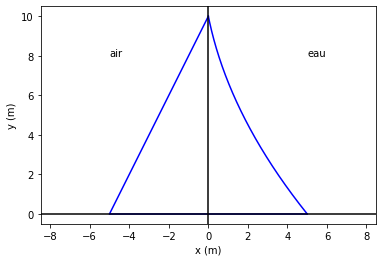

In [8]:
a = 3
xa = -5
xe = +5

def feau(y):
    return a * (y / H) ** 2 - (a + xe) * (y / H) + xe

def f_p_eau(y):
    return ((2 * a * y) / (H ** 2)) -  ((a + xe) / H)

# On trace
plt.plot(fair(y), y, '-b') 
plt.plot(feau(y), y, '-b')  ## Décommenter après avoir codé la fonction feau(x)
 
plt.plot([xe, xa], [0, 0], '-b') # Bas de la digue
plt.xlabel('x (m)') 
plt.ylabel('y (m)')
plt.text(xe, 8, 'eau')
plt.text(xa, 8, 'air')
plt.axis('equal') # Permet d'avoir un plot isométrique
plt.axhline(0, color = "black")
plt.axvline(0, color = "black")
plt.xlim(-8, 8)
plt.show()

In [9]:
## a
a = 3
xa = 0
xe = 5

v_digue  = calculate_volume(calcule_integrale, fair, feau, xa, xe, H, L)
v_eau = calculate_volume_eau(xe)

print("Le volume de la digue par intégration:", v_digue, "m3")
print("Le volume de la séction d'eau:", v_eau, "m3")
print("Le volume totale:", v_digue + v_eau, "m3")

w = calculate_weight(m_digue, v_eau)
print("Le poids totale est w =", np.around(w,2), "N")

## b
F_p = calculate_forces(feau, f_p_eau)
F_f = calculate_friction(w)

F_p_3 = F_p

print("La force moyenne = ", np.around(F_p, 2), "N")
print("La force frottement = ", np.around(F_f, 2), "N")

# C
is_the_dam_stable(F_p, F_f)

Le volume de la digue par intégration: 20.0 m3
Le volume de la séction d'eau: 33.33 m3
Le volume totale: 53.33 m3
Le poids totale est w = 356034.0 N
La force moyenne =  7897.2 N
La force frottement =  178017.0 N
La digue est en équilibre translationnel avec une force résultant:  -170119.8 N


In [10]:
a = 5
xa = 0
xe = 5

v_digue  = calculate_volume(calcule_integrale, fair, feau, xa, xe, H, L)
v_eau = calculate_volume_eau(xe)

print("Le volume de la digue par intégration:", v_digue, "m3")
print("Le volume de la séction d'eau:", v_eau, "m3")
print("Le volume totale:", v_digue + v_eau, "m3")

w = calculate_weight(m_digue, v_eau)
print("Le poids totale est w =", np.around(w,2), "N")

## b
F_p = calculate_forces(feau, f_p_eau)
F_f = calculate_friction(w)

F_p_5 = F_p

print("La force moyenne = ", np.around(F_p, 2), "N")
print("La force frottement = ", np.around(F_f, 2), "N")

Le volume de la digue par intégration: 16.67 m3
Le volume de la séction d'eau: 33.33 m3
Le volume totale: 50.0 m3
Le poids totale est w = 356034.0 N
La force moyenne =  1286.17 N
La force frottement =  178017.0 N


In [11]:
percentage_reduction = (F_p_3 - F_p_5) * 100 / F_p_3
print("Le percentage de réduction entre a=3 et a=5 est ",np.around(percentage_reduction,2), "%")

Le percentage de réduction entre a=3 et a=5 est  83.71 %


On constate que la force de pression diminue de 83% lorsque la courbure est plus accentuée.

In [12]:
## a
a = 3
xa = 0
xe = 6

v_digue  = calculate_volume(calcule_integrale, fair, feau, xa, xe, H, L)
v_eau = calculate_volume_eau(xe)

print("Le volume de la digue par intégration:", v_digue, "m3")
print("Le volume de la séction d'eau:", v_eau, "m3")
print("Le volume totale:", v_digue + v_eau, "m3")

w = calculate_weight(m_digue, v_eau)
print("Le poids totale est w =", np.around(w,2), "N")

## b
F_p = calculate_forces(feau, f_p_eau)
F_f = calculate_friction(w)

print("La force moyenne = ", np.around(F_p, 2), "N")
print("La force frottement = ", np.around(F_f, 2), "N")

# C
is_the_dam_stable(F_p, F_f)

Le volume de la digue par intégration: 25.0 m3
Le volume de la séction d'eau: 40.0 m3
Le volume totale: 65.0 m3
Le poids totale est w = 421400.0 N
La force moyenne =  5691.47 N
La force frottement =  210700.0 N
La digue est en équilibre translationnel avec une force résultant:  -205008.53 N


## Conclusion


On a réussi a comparer différents scénarios d'une digue immergé et soumis à une force de l'eau. Pour les cas où `xe = 0`, on a montré que l'eau peut déplacer la digue. 

Ainsi pour les cas où la digue est composée d'une fonction courbée (quadratique), la pression de l'eau est mieux répartie, rendant plus difficile le déplacement de la digue. Cela dépend de la courbe, par exemple avec un valeur `a = 3`, la force de pression diminue fortement par rapport à celle calculée pour une digue de fonction linéaire.